In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/78368881/curve-fitting-with-scipy-failing-to-give-a-correct-fit

In [2]:
x_data = np.array([51.5056, 51.5058, 51.5061, 51.5064, 51.5067, 51.5069, 51.5072,
       51.5075, 51.5078, 51.5081, 51.5083, 51.5086, 51.5089, 51.5092,
       51.5094, 51.5097, 51.51  , 51.5103, 51.5106, 51.5108, 51.5111,
       51.5114, 51.5117, 51.5119, 51.5122, 51.5125, 51.5128, 51.5131,
       51.5133, 51.5136, 51.5139, 51.5142, 51.5144, 51.5147, 51.515 ,
       51.5153, 51.5156, 51.5158, 51.5161, 51.5164, 51.5167, 51.5169,
       51.5172, 51.5175, 51.5178, 51.5181, 51.5183, 51.5186, 51.5189,
       51.5192, 51.5194, 51.5197, 51.52  , 51.5203, 51.5206, 51.5208,
       51.5211, 51.5214, 51.5217, 51.5219, 51.5222, 51.5225, 51.5228,
       51.5231, 51.5233, 51.5236, 51.5239, 51.5242, 51.5244, 51.5247,
       51.525 , 51.5253, 51.5256, 51.5258, 51.5261, 51.5264, 51.5267,
       51.5269, 51.5272, 51.5275, 51.5278, 51.5281, 51.5283, 51.5286,
       51.5289, 51.5292, 51.5294, 51.5297, 51.53  , 51.5303, 51.5306,
       51.5308, 51.5311, 51.5314, 51.5317, 51.5319, 51.5322, 51.5325,
       51.5328, 51.5331, 51.5333, 51.5336, 51.5339, 51.5342])

y_data = np.array([2.99 , 2.998, 3.024, 3.036, 3.038, 3.034, 3.03 , 3.025, 3.02 ,
       3.016, 3.012, 3.006, 3.003, 3.   , 2.997, 2.995, 2.993, 2.99 ,
       2.989, 2.987, 2.986, 2.985, 2.983, 2.983, 2.982, 2.98 , 2.98 ,
       2.979, 2.978, 2.978, 2.976, 2.977, 2.976, 2.975, 2.975, 2.975,
       2.975, 2.974, 2.975, 2.974, 2.974, 2.974, 2.973, 2.974, 2.973,
       2.974, 2.973, 2.974, 2.974, 2.974, 2.974, 2.974, 2.974, 2.974,
       2.973, 2.974, 2.974, 2.974, 2.974, 2.974, 2.974, 2.974, 2.974,
       2.975, 2.974, 2.975, 2.975, 2.976, 2.976, 2.976, 2.976, 2.975,
       2.976, 2.976, 2.977, 2.977, 2.976, 2.977, 2.977, 2.977, 2.977,
       2.978, 2.978, 2.978, 2.979, 2.978, 2.978, 2.979, 2.979, 2.979,
       2.979, 2.979, 2.98 , 2.98 , 2.98 , 2.98 , 2.98 , 2.981, 2.981,
       2.981, 2.981, 2.982, 2.981, 2.982])

In [3]:
x_data -= x_data.min()
#y_data -= y_data[0]

In [4]:
def model(x, a, b, c, d, e):
    return a * (1 - b * np.exp(-c * x) * np.sin(d * x + e))

In [5]:
def model(t, K, zeta, omega_n):
    omega_d = omega_n * np.sqrt(1 - zeta ** 2)
    phi = np.arccos(zeta)
    return K * (1. - (1. / np.sqrt(1 - zeta ** 2)) * np.exp(-zeta * omega_n * t) * np.sin(omega_d * t + phi))

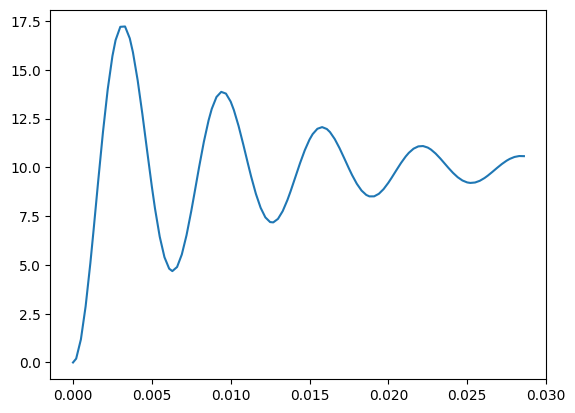

In [6]:
fig, axe = plt.subplots()
axe.plot(x_data, model(x_data, 10, 0.1, 1000.))

In [7]:
popt, pcov = optimize.curve_fit(
    model, x_data, y_data, p0 = [0.01, .15, 1000.],
    bounds=[
        (0., 0., 0.),
        (np.inf, 1., np.inf)
    ],
    #maxfev=5000
)
popt, pcov

(array([2.98305803e+00, 8.57353022e-01, 4.37337184e+04]),
 array([[ 8.78661584e-04, -1.59461000e+03, -1.18751524e+06],
        [-1.59461000e+03,  2.95199446e+11,  2.20093651e+14],
        [-1.18751524e+06,  2.20093651e+14,  1.64096794e+17]]))

In [8]:
yhat = model(x_data, *popt)

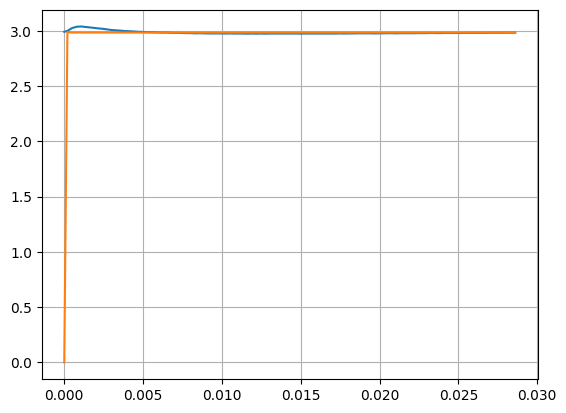

In [9]:
fig, axe = plt.subplots()
axe.plot(x_data, y_data)
axe.plot(x_data, yhat)
axe.grid()